## Условная вероятность

Пусть есть два события $A$ -- и $B$ --. Тогда условной вероятностью называется выражение следующего вида:

$$p(A|B) = \frac{p(A, B)}{p(B)}$$

Которое показывает какая вероятность наступить событию $A$, если событие $B$ точно наступило.

Если $p(A|B)=p(A)$, то говорят что событие $A$ не зависит от $B$.

## Формула Байеса

Формула Байеса выводится из формулы условной вероятности в два щелчка:

$$p(A|B) = \frac{p(A, B)}{p(B)} = \frac{p(B|A) p(A)}{p(B)}$$

## Задача 0.

#### Если известно что в семье два ребёнка, то какая вероятность, что один из них мальчик?

$$p(b) = \frac{1}{2}$$


#### Если известно что в семье два ребёнка и один из них мальчик, то какая вероятность, что второй тоже мальчик?

$$p(bb | b) = \frac{p(b | b) p(bb)}{p(b)} = \frac{1 \frac{1}{4}}{\frac{3}{4}}$$

#### Если известно что в семье два ребёнка и один из них мальчик родившийся во вторник, то какая вероятность, что второй тоже мальчик?



## Задача 1.

Представим ситуацию, что вы едете на работу и тут вам на телефон приходит сообщение о сработавшей сигнализации(переменная $t \in \{0, 1\}$). Сигнализация может сработать по двум причинам: воры в доме(переменная $v \in \{0, 1\}$) или слабое землетрясение(переменная $e \in \{0, 1\}$). 

В случае слабого землятрясения сигнализация срабатывает в 10% случаев($p(t=1|v=0, e=1)=0.1$).

#### Подзадача 1.

Вам нужно принять решение: взять отгул и поехать домой или поехать на работу. Для этого нужно первым делом оценить вероятность того при сработавшей сигнализации дома есть вор: $p(v=1 | t=1)$.  

Известно: $p(e) = 10^{-2}$, т.е. вероятность землятрясения 1%, $p(v) = 2 10^{-4}$

Таблица, которая суммирует информацию перечисленную выше:

| p(t=1\|v, e) | v | e |
|-------------|---|---|
|  0          | 0 | 0 |
| 0.1         | 0 | 1 |
| 1           | 1 | 0 |
| 1           | 1 | 1 |

#### Подзадача 2.

Дополнительно вам известна сводка криминогенной активности района: $s = 2 \cdot 10^{-3}$, т.е. $p(v=1|s) = s$. 

#### Подзадача 3. Удалить.

В дополнении ко всему вышесказанному, по радио (передали/не передали) что произошло слабое землятрясение. Радио сообщает о землятрясениях в 50% случаев.

| p(r=1\|e) | e  |
|----------|----|
| 0        | 0  |
| 0.5      |  1 |

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=2)

#### Решение подзадачи 1.

Посчитаем вероятность вора в квартире при сработавшей сигнализации используя формулу Байеса:

$$ p(v=1|t=1) = \frac{p(t=1|v=1) p(v=1)}{p(t=1|v=1) p(v=1) + p(t=1|v=0) p(v=0)}$$

$p(t|v)$ вычисляем по формуле полной вероятности:

$$p(t=1|v=1) = \sum\limits_{e \in \{ 0, 1 \} } p(t=1 | v=1, e) p(e) = 1$$

$$p(t=0|v=0) = 10^{-3}$$

Тогда получаем: $$ p(v=1|t=1) = \frac{1}{6} \approx 17 \%$$

In [2]:
def p_v_1_t_1(p_e=0.01, p_v=2e-4, p_t_1_v_0_e_1=0.1):
    """
    Функция расчёта p(v=1|t=1)
    """
    p_t_1_v_1 = 1 # не зависит от переменных
    p_t_0_v_1 = p_t_1_v_0_e_1 * p_e
    p_v_1_t_1 = p_t_1_v_1 * p_v / (p_t_1_v_1 * p_v + p_t_0_v_1 * (1 - p_v))
    return p_v_1_t_1

Text(0.5,1,'Зависимость')

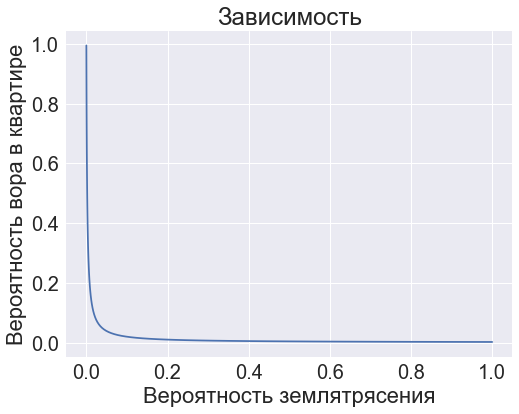

In [3]:
p_e=np.logspace(-5, 0, 100)

plt.figure(figsize=(8, 6))
plt.plot(p_e, p_v_1_t_1(p_e=p_e))
plt.xlabel('Вероятность землятрясения')
plt.ylabel('Вероятность вора в квартире')
# plt.yscale('log')
# plt.xscale('log')
plt.title('Зависимость')

Text(0.5,1,'Зависимость')

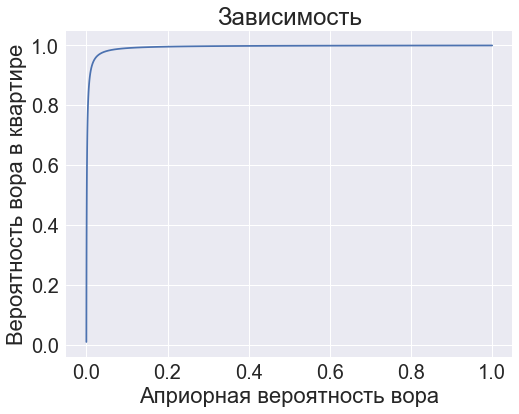

In [4]:
p_v=np.logspace(-5, 0, 100)

plt.figure(figsize=(8, 6))
plt.plot(p_v, p_v_1_t_1(p_v=p_v))
plt.xlabel('Априорная вероятность вора')
plt.ylabel('Вероятность вора в квартире')
plt.title('Зависимость')

Text(0.5,1,'Зависимость')

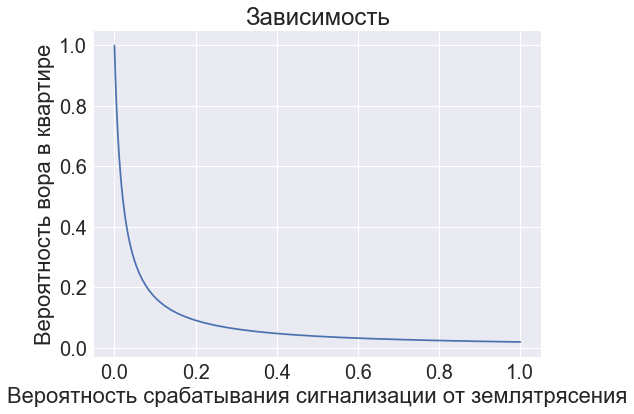

In [5]:
p_t_1_v_0_e_1=np.logspace(-5, 0, 100)

plt.figure(figsize=(8, 6))
plt.plot(p_t_1_v_0_e_1, p_v_1_t_1(p_t_1_v_0_e_1=p_t_1_v_0_e_1))
plt.xlabel('Вероятность срабатывания сигнализации от землятрясения')
plt.ylabel('Вероятность вора в квартире')
plt.title('Зависимость')

In [6]:
p_v=np.logspace(-5, 0, 100)
p_t_1_v_0_e_1=np.logspace(-5, 0, 100)
# p_v=np.linspace(0, 1, 100)
# p_t_1_v_0_e_1=np.linspace(0, 1, 100)
p_v, p_t_1_v_0_e_1 = np.meshgrid(p_v, p_t_1_v_0_e_1)
probs = p_v_1_t_1(p_v=p_v, p_t_1_v_0_e_1=p_t_1_v_0_e_1)
log_probs = np.log(probs)

Text(0.5,1,'Вероятность вора в квартире если сработала сигнализация')

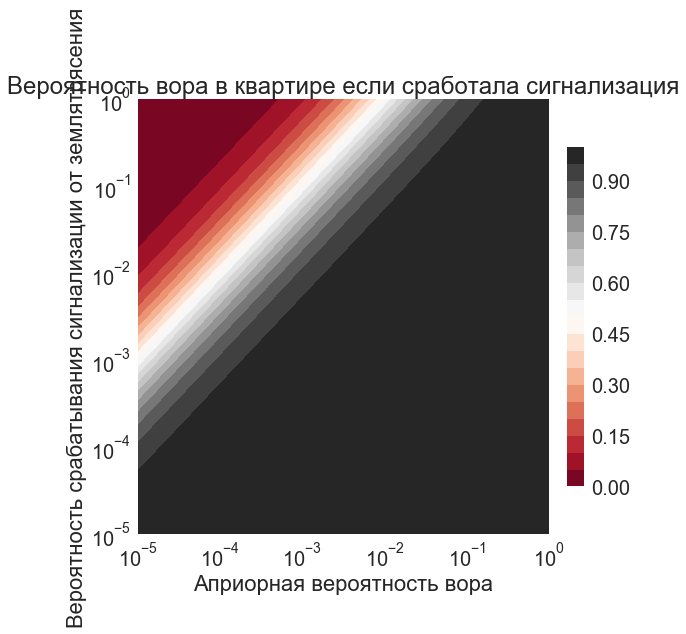

In [7]:
plt.figure(figsize=(8, 8))
plt.contourf(p_v, p_t_1_v_0_e_1, probs, 20, cmap='RdGy')
plt.colorbar(fraction=0.038, pad=0.04);
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Априорная вероятность вора')
plt.ylabel('Вероятность срабатывания сигнализации от землятрясения')
plt.title('Вероятность вора в квартире если сработала сигнализация')

#### Решение подзадачи 2.

$$p(v=1|t=1, s_0) = \frac{1}{Z} \frac{p(v=1|t=1) p(v=1|s_0)}{p(v=1)} = \frac{1}{Z} \frac{10}{6}$$

Здесь $Z$ -- нормализационная константа, которая обеспечивает что вероятности складываются в 1. Это формула получается применением формулы Байеса трижды. Во-первых, $$p(v=1|t=1, s_0) = \frac{ p(t=1, s_0 | v=1) p(v=1)}{p(s_0, t=1)}$$. Далее мы замечаем, что переменные $t$ и $s_0$ условно независимы если известно, что вор уже в квартире, т.е. $$\frac{p(t=1, s_0 | v=1) p(s_0, t=1)}{p(v=1)} = \frac{p(t=1 | v=1) p(s_0 | v=1) p(v=1)}{p(s_0, t=1) }.$$ 

Здесь мы второй и третий раз используем формулу Байеса:

$$\frac{p(t=1 | v=1) p(s_0 | v=1) p(v=1)}{p(s_0, t=1) } =$$ $$ = \frac{p(v=1|t=1) p(t=1) p(v=1|s_0) p(s_0) p(v=1) }{p(s_0, t=1) p(v=1) p(v=1)} \sim \frac{1}{Z} \frac{p(v=1|t=1) p(v=1|s_0)}{p(v=1)}$$

Аналогично:

$$p(v=0|t=1, s_0) = \frac{1}{Z} \frac{5}{6}$$

Получаем: $p(v=0|t=1, s_0) +  p(v=1|t=1, s_0) = 1 ~ \Rightarrow ~ Z = 15 /6$.

Тогда $p(v=1|t=1, s_0) = 2 / 3 \approx 67\%$


In [8]:
def p_v_1_t_1_s(p_e=0.01, p_v=2e-4, p_t_1_v_0_e_1=0.1, v_1_s=2e-3):
    p_v_1_t_1_temp = p_v_1_t_1(p_e=p_e, p_t_1_v_0_e_1=p_t_1_v_0_e_1, p_v=p_v)
    
    p_v_1_t_1_s = p_v_1_t_1_temp * v_1_s / p_v
    p_v_0_t_1_s = (1 - p_v_1_t_1_temp) * (1 - v_1_s) / (1 - p_v)
    Z = p_v_1_t_1_s + p_v_0_t_1_s
    return p_v_1_t_1_s / Z

In [9]:
p_v=np.logspace(-5, -1e-5, 10)
v_1_s=np.logspace(-5, -1e-5, 10)
# p_v=np.linspace(0, 1, 100)
# p_t_1_v_0_e_1=np.linspace(0, 1, 100)
p_v, v_1_s = np.meshgrid(p_v, v_1_s)
probs = p_v_1_t_1_s(p_v=p_v, v_1_s=v_1_s)
log_probs = np.log(probs)

Text(0.5,1,'Вероятность вора в квартире если сработала сигнализация')

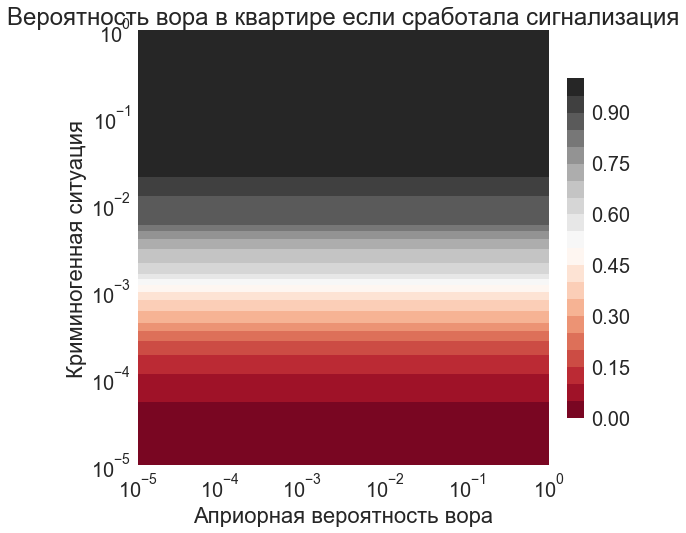

In [10]:
plt.figure(figsize=(8, 8))
plt.contourf(p_v, v_1_s, probs, 20, cmap='RdGy')
plt.colorbar(fraction=0.038, pad=0.04);
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Априорная вероятность вора')
plt.ylabel('Криминогенная ситуация')
plt.title('Вероятность вора в квартире если сработала сигнализация')

## Корреляция

Классический вариант корреляции это корреляция Пирсона:

$$r_{xy} = \frac{cov(x, y)}{\sqrt{s_x^2 s_y^2}}$$

In [11]:
import pandas as pd
data = pd.read_csv('./wpbc.data', header=None, names=[
    'ID', 'outcome', 'time', 
    'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension',
    'radius_std', 'texture_std', 'perimeter_std', 'area_std', 'smoothness_std', 'compactness_std', 'concavity_std', 'concave_points_std', 'symmetry_std', 'fractal_dimension_std',
    'radius_max', 'texture_max', 'perimeter_max', 'area_max', 'smoothness_max', 'compactness_max', 'concavity_max', 'concave_points_max', 'symmetry_max', 'fractal_dimension_max',
    'tumor_size', 'lymph_node_status'
])

In [12]:
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    cov = np.mean((x - x_mean) * (y - y_mean))
    return cov / (x_std * y_std)

Text(0,0.5,'Дисперсия размеров опухолей')

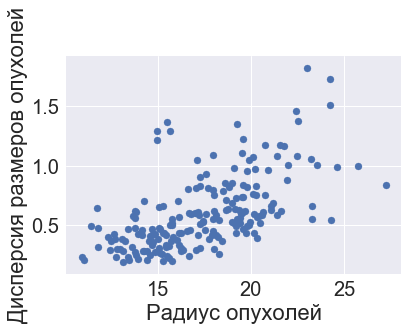

In [13]:
plt.scatter(data.radius, data.radius_std)
plt.xlabel('Радиус опухолей')
plt.ylabel('Дисперсия размеров опухолей')

In [14]:
pearson_correlation(data.radius, data.radius_std)

0.6020350244742805

In [15]:
np.corrcoef(data.radius, data.radius_std)

array([[1.        , 0.60203502],
       [0.60203502, 1.        ]])

In [16]:
from scipy.stats import pearsonr
pearsonr(data.radius, data.radius_std)

(0.6020350244742806, 6.523962202313828e-21)

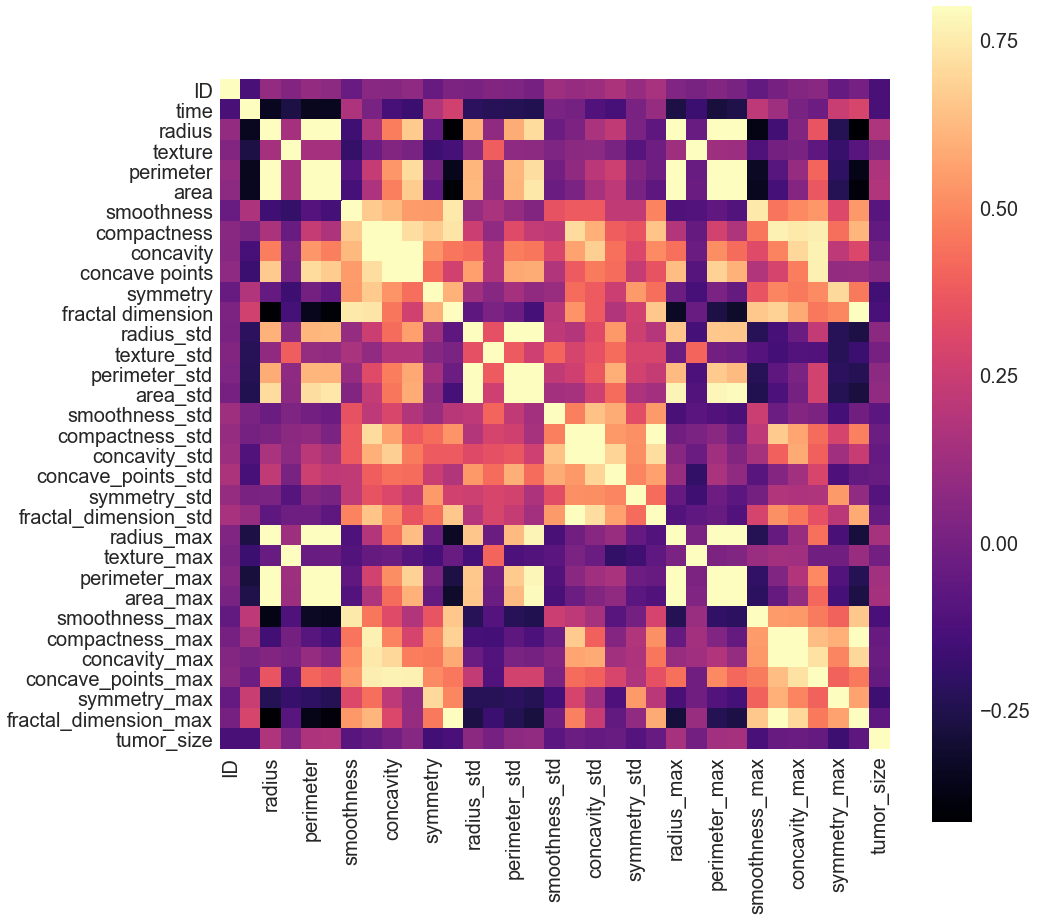

In [17]:
corr = data.corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

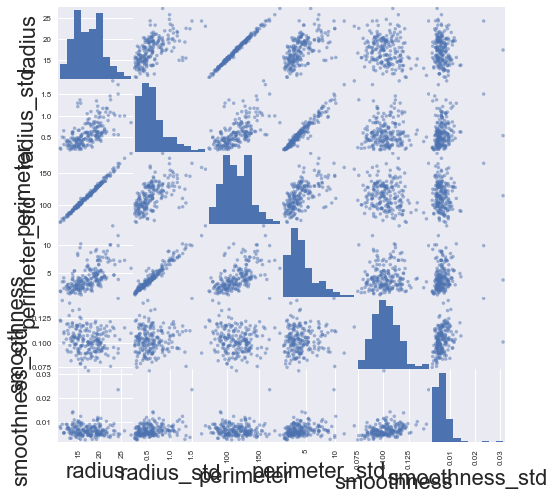

In [18]:
pd.plotting.scatter_matrix(data[['radius', 'radius_std', 'perimeter', 'perimeter_std', 
                                 'smoothness', 'smoothness_std']], figsize=(8, 8) )
plt.show()

## Метод моментов

Идея простая. Если мы хотим определить параметры некоторого распределения $p(x | \theta)$, то давайте приравняем моменты данного распределения к моментам подсчитанным по данным($X = \{ x_1, \dots, x_n \}$) и решим уравнения относительно данных моментов.

Моменты по данным считаются следующим образом:

$$\hat{\mu}_k = \frac{1}{n} \sum\limits_{i=1}^{n} x_i^k$$

Моменты распределений:

$$\mu_k = \sum\limits_{i=1}^{n} x^k p(x | \theta) dx$$

##### Задача 

Приспособленность это центральная концепция теории революции. 

Относительная приспособленность это среднее количество выживших представителей одного генотипа к среднему количеству выживших другого генотипа. 

Eyre-Walker (2006) ( https://www.ncbi.nlm.nih.gov/pubmed/16547091 ) предположили что функция преспособленности принадлежит семейству гамма-распределений случайных величин. 

Они проверили своё предположение для популяций с (странный геном) и без него и с помощью метода моментов оценили параметры гамма-распределения.
 
$$\hat{\alpha} = 0.23,~~~ \hat{\beta} = 5.35$$

$$\Gamma(x|k, \theta) =  \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x),$$

где $\Gamma(\alpha)$ -- гамма-функция Эйлера(для целых $\alpha$: $\Gamma(k) = (\alpha-1)!$)

In [19]:
from scipy.stats import gamma

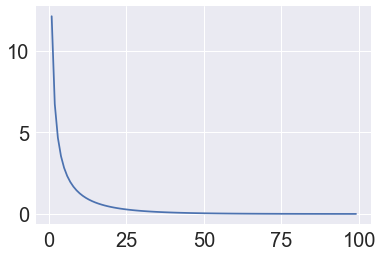

In [20]:
# scale == \theta
# в scipy все распределения определены с точность до смещения и масштаба
x = np.linspace(0, 1, 100)
alpha = 0.23
beta = 5.35
plt.plot(gamma.pdf(x, scale=1 / beta, a=alpha))

Зададимся следующим вопросом: как высока вероятность ошибиться(дисперсия оценок) и как высока вероятность ошибиться в одном и том же направлении используя метод моментов?

Среднее и дисперсия гамма-распределения:

$$\mu(\Gamma) = \frac{\alpha}{\beta}$$

$$Var(\Gamma) = \frac{\alpha}{\beta^2}$$

Применяем метод моментов:

$$\hat{\mu}_1 = \frac{\alpha}{\beta}$$

$$\hat{\mu}_2 = \frac{\alpha^2}{\beta^2} + \frac{\alpha}{\beta^2}$$

Решая систему уравнений получаем:

$$\beta = \frac{\hat{\mu}_1}{\hat{\mu}_2 - \hat{\mu}_1^2}$$

$$\alpha = \hat{\mu}_1 \beta$$

In [21]:
boot = 1000
alphas = []
betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)
    mu_1 = X.mean()
    mu_2 = np.square(X).mean()
    betas.append(
        mu_1 / (mu_2 - mu_1**2)
    )
    
    alphas.append(
        mu_1**2 / (mu_2 - mu_1**2)
    )

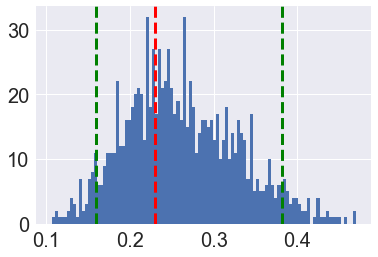

In [22]:
plt.hist(alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

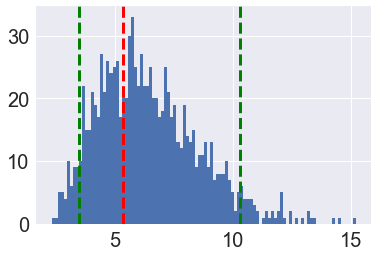

In [23]:
plt.hist(betas, bins=100);
beta_q5, beta_q95 = np.percentile(betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

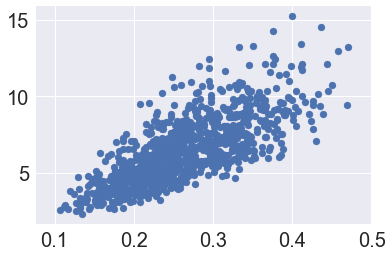

In [24]:
plt.scatter(alphas, betas)

In [25]:
from scipy.stats.stats import pearsonr

In [26]:
np.corrcoef(alphas, betas)

array([[1.        , 0.75274856],
       [0.75274856, 1.        ]])

In [27]:
pearsonr(alphas, betas)

(0.7527485613987076, 2.0780181670068963e-183)

Как видно, они очень сильно скоррелированы, другими словами, обе величины оценные методом мометов будут или переоценены или недооценены одновременно.

## Правдоподобие

MLE(Метод оценки параметров максимума правдоподобия) основывается на максимизации вероятности пронаблюдать выборку.

$$\mathcal{L} = \prod p(x_i|\theta)$$

Будем рассматривать MLE на примере задачи выше.



In [28]:
X = gamma.rvs(scale=1 / beta, a=alpha, size=100)

In [29]:
gamma.pdf(X[0], scale=1 / beta, a=alpha)

2472644.313723285

In [30]:
np.prod(gamma.pdf(X, scale=1 / beta, a=2.5))

3.034239522557943e-215

Уравнение правдоподобия чаще всего записывается с использованием логарифма вероятности, так как в этом случае произведение переходит в сумму, что сильно упрощает жизнь.

$$\mathcal{\log L} = \sum\limits_i \log p(x_i|\theta)$$

  * лучше численная стабильность(overflow или underflow чисел);
  * лучше градиенты(более гладкая задача).

Посмотрим на зависимость log-likelihood для нашей задачи с гамма-распределением.

$$\mathcal{L} = \prod\limits_i \frac{\beta^\alpha}{\Gamma(\alpha)} {x_i}^{\alpha-1} \exp(-\beta x_i)$$

$$\mathcal{\log L} = \sum\limits_i \left(  \alpha \log \beta - \log \Gamma(\alpha) - \beta x_i + (\alpha - 1) \log x_i \right)$$

(Обратим внимание насколько простой стала зависимость от $x_i$:)

Text(0.5,1,'Likelihood')

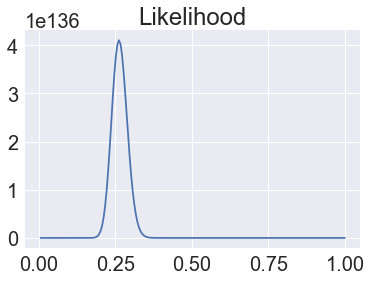

In [31]:
a = np.linspace(0, 1, 200)
plt.plot(
    a, 
    np.prod(gamma.pdf(X[:, np.newaxis], 
                      scale=1 / beta, 
                      a=a), 
            axis=0)
)
plt.title('Likelihood')

Text(0.5,1,'Log-Likelihood')

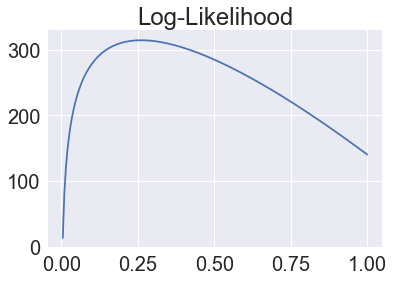

In [32]:
plt.plot(
    a, 
    np.sum(gamma.logpdf(X[:, np.newaxis], 
                        scale=1 / beta, 
                        a=a), 
            axis=0)
)
plt.title('Log-Likelihood')

Разница очевидна :)

### MLE? MLE!

В большинстве задач, если это не игровые примеры, найти явную форму для оценки параметров с помощью MLE очень сложно.

$$\theta^* = \arg \max \mathcal{\log L(X, \theta)}$$

Берём первую производную по каждому параметра распределения и приравниваем к нулю:

$$ \mathcal{\log L}'(X, \theta) = 0$$

Для параметра $\beta$ гамма-распределения:

$$\mathcal{\log L}'_\beta = \sum\limits_{i} \frac{\alpha}{\beta} - x_i = 0$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Для параметра $\alpha$:

$$\mathcal{\log L}'_\alpha = \sum \log \beta + \log x_i - \psi(\alpha) = 0$$

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$

Увы, точного решения нет. 

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Но есть кое-что лучше(и более применимое на практике)

In [33]:
gamma.fit?

In [34]:
alpha, _, beta = gamma.fit(X, floc=0.)
beta = 1 / beta
print(alpha, beta)

0.25769691786646265 5.038576972951859


In [35]:
boot = 1000
alphas = []
betas = []
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)
    fit_alpha, _, fit_beta = gamma.fit(X, floc=0)
    fitted_betas.append(1 / fit_beta)
    fitted_alphas.append(fit_alpha)

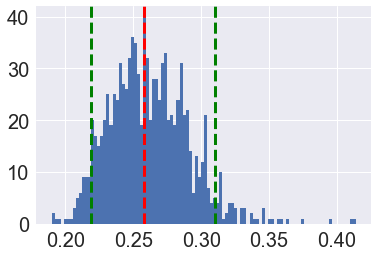

In [36]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

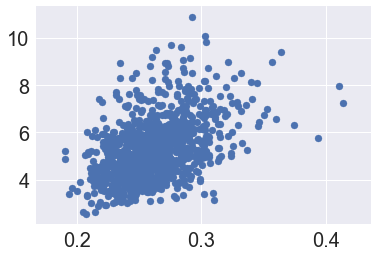

In [37]:
plt.scatter(fitted_alphas, fitted_betas)

In [38]:
np.corrcoef(fitted_alphas, fitted_betas)

array([[1.        , 0.45968188],
       [0.45968188, 1.        ]])

Как видно, корреляция стала ещё меньше!

## Bonus part

Этим инструментом я пользусь в жизни и работе :)

In [39]:
from matplotlib import pyplot as plt
import numpy as np

# сгенерируем выборку из двух нормальных распределений

# задаём параметры смеси
N = 10000
mu_1, sigma_1 = 3, 2
mu_2, sigma_2 = -5, 2
p = 0.3

In [40]:
# два распределения
dist_1 = np.random.randn(N) * sigma_1 + mu_1
dist_2 = np.random.randn(N) * sigma_2 + mu_2

In [41]:
# смешиваем их
mask = np.random.choice([0, 1], p=[p, 1 - p], size=N)
dist = dist_1 * mask + dist_2 * (1 - mask)

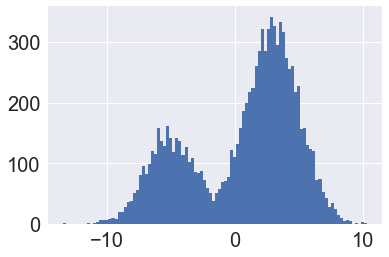

In [42]:
plt.hist(dist, bins=100);

In [43]:
from probfit import AddPdf, gaussian, Normalized, AddPdfNorm, UnbinnedLH, BinnedLH
from iminuit import Minuit

In [44]:
gaussian?

In [45]:
# задаём функции, которые считают pdf в точке x
def gaussian_one(x, mean_1, sigma_1):
    return gaussian(x, mean_1, sigma_1)

# гауссово распределение задаётся два раза одинаковым образом
# чтобы имена переменных были разных
def gaussian_two(x, mean_2, sigma_2):
    return gaussian(x, mean_2, sigma_2)

# AddPdfNorm складывает распределения в данному случе в результате будет
# pdf = N(x|mean_1, sigma_1) + N(x|mean_2, sigma_2)
pdf = AddPdfNorm(gaussian_one, gaussian_two, facname=['prob'])

In [46]:
# UnbinnedLH берёт pdf и данные и считает log-likelihood 
unbinned_likelihood = UnbinnedLH(pdf, dist)
unbinned_likelihood(3, 2, -5, 3, 0.1)

34700.27491535937

In [47]:
# начальное приближение для переменных
init = dict(
    mean_1=1,
    sigma_1=1,
    mean_2=-1,
    sigma_2=1,
    prob=0.5,
)

# их пределы
# особенно важно для sigma, которое не может быть отрицательным
limits = dict(
    limit_mean_1 = (-100, 100),
    limit_mean_2 = (-100, 100),
    limit_sigma_1 = (0, 100),
    limit_sigma_2 = (0, 100),
    limit_prob = (0., 1.)
)

# начальный шаг минимизации
# если он слишком большой, то не сойдётся минимизация

errors = dict(
    error_mean_1=0.01,
    error_mean_2=0.01,
    error_sigma_1=0.01,
    error_sigma_2=0.01,
    error_prob=0.01,
)
minuit = Minuit(unbinned_likelihood, **init, **limits, **errors)

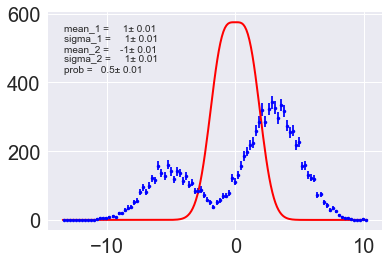

In [48]:
unbinned_likelihood.draw(minuit=minuit);

In [49]:
# первый этап минимизации
minuit.migrad()

FCN = 26731.141255397586 
 TOTAL NCALL = 175 
 NCALLS = 175 
 
 
 EDM = 3.750999976792252e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mean_1,2.98388,0.0281394,,,-100,100,No
1,sigma_1,2.03801,0.0220225,,,0,100,No
2,mean_2,-5.09922,0.0455407,,,-100,100,No
3,sigma_2,1.94077,0.0339643,,,0,100,No
4,prob,0.704253,0.00497216,,,0,1,No


({'fval': 26731.141255397586,
  'edm': 3.750999976792252e-06,
  'nfcn': 175,
  'up': 0.5,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'mean_1',
   'value': 2.983883934614312,
   'error': 0.028139364561788227,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': -100.0,
   'upper_limit': 100.0},
  {'number': 1,
   'name': 'sigma_1',
   'value': 2.038010916835625,
   'error': 0.02202251490711893,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.0,
   'upper_limit': 100.0},
  {'number': 2,
   'name': 'mean_2',
   'value': -5.099218740049608,
   'error': 0.0455407449550193

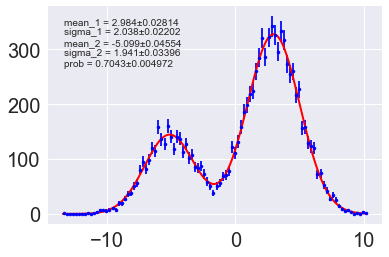

In [50]:
unbinned_likelihood.draw(minuit=minuit);

In [51]:
# возвращаются ошибки
result = minuit.minos()

Error,-0.027900357112397783,0.027796580445684425
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.02143138044123384,0.021835620745709293
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.044984410665669425,0.04569963657430094
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.03436808727516024,0.035339215133624424
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.005070021048476656,0.005043613620744597
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


### Пример для гамма

In [52]:
def GammaProbfitPdx(x, alpha, beta):
    return gamma.pdf(x, scale=1/beta, a=alpha)

In [53]:
unbinned_likelihood = UnbinnedLH(GammaProbfitPdx, X)
unbinned_likelihood(0.23, 5.)

-336.256978299716

In [54]:
# начальное приближение для переменных
init = dict(
    alpha=1,
    beta=1,
)

# их пределы
# особенно важно для sigma, которое не может быть отрицательным
limits = dict(
    limit_alpha = (0, 100),
    limit_beta = (0, 100),
)

# начальный шаг минимизации
# если он слишком большой, то не сойдётся минимизация

errors = dict(
    error_alpha=0.01,
    error_beta=0.01,
)
minuit unbinned_likelihood.draw(minuit=minuit);= Minuit(unbinned_likelihood, **init, **limits, **errors)

SyntaxError: invalid syntax (<ipython-input-54-d03fedb099a6>, line 21)

In [ ]:
unbinned_likelihood.draw(minuit=minuit);

In [ ]:
# первый этап минимизации
minuit.migrad()

In [ ]:
unbinned_likelihood.draw(minuit=minuit);

In [ ]:
result = minuit.minos()